# Pandas:

Pandas is an opensource library that allows to you perform data manipulation in Python. Pandas library is built on top of Numpy, meaning Pandas needs Numpy to operate. Pandas provide an easy way to create, manipulate and wrangle the data. Pandas is also an elegant solution for time series data.

- pandas
   - series
       - constructing from dictionaries
       - custom index
       - data filtering
- Data Frames
    - constructing from dictionaries with values as lists

series:a series is a one-dimensional array-like object containing an array of data , which can be any numpy data type , and an associated array of data labels, functioning as its index

In [1]:
import pandas as pd

In [2]:
s = pd.Series ([36, 35,45,42,25,39], dtype = float)
s

0    36.0
1    35.0
2    45.0
3    42.0
4    25.0
5    39.0
dtype: float64

In [3]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [4]:
s.values

array([36., 35., 45., 42., 25., 39.])

In [5]:
s[4]

25.0

In [6]:
s = pd.Series ([36, 35,45,42,25,39], index = ['sun','mon','tues','wed','thr','fri'])
s

sun     36
mon     35
tues    45
wed     42
thr     25
fri     39
dtype: int64

In [7]:
s['fri']

39

In [8]:
s = pd.Series ([36, 35,45,42,25,39], index=range(1,7))
s

1    36
2    35
3    45
4    42
5    25
6    39
dtype: int64

In [9]:
exp_dates = [1,2,4,5,7,3]
s = pd.Series ([36, 35,45,42,25,39], index=exp_dates)
s

1    36
2    35
4    45
5    42
7    25
3    39
dtype: int64

In [10]:
None ==None

True

In [11]:
import numpy as np
np.nan == np.nan

False

In [12]:
print ('max', s.max())
print ('min', s.min())
print ('avg', s.mean())
print ('std', s.std())

max 45
min 25
avg 37.0
std 6.957010852370434


In [13]:
s.describe()

count     6.000000
mean     37.000000
std       6.957011
min      25.000000
25%      35.250000
50%      37.500000
75%      41.250000
max      45.000000
dtype: float64

In [14]:
s.isnull()# no null so false

1    False
2    False
4    False
5    False
7    False
3    False
dtype: bool

In [15]:
s


1    36
2    35
4    45
5    42
7    25
3    39
dtype: int64

In [16]:
s[s.isnull()]=0

In [17]:
s.describe()

count     6.000000
mean     37.000000
std       6.957011
min      25.000000
25%      35.250000
50%      37.500000
75%      41.250000
max      45.000000
dtype: float64

In [18]:
fruits = ['apples','oranges','cherries','pears','mango']
quantities = [20,33,52,10,40]
s = pd.Series(quantities, index=fruits)
s

apples      20
oranges     33
cherries    52
pears       10
mango       40
dtype: int64

In [19]:
s['mango']

40

In [20]:
import numpy as np
print((s+3)*4)
print("========")

apples       92
oranges     144
cherries    220
pears        52
mango       172
dtype: int64


In [21]:
np.sin(s)

apples      0.912945
oranges     0.999912
cherries    0.986628
pears      -0.544021
mango       0.745113
dtype: float64

In [22]:
np.cos(s)

apples      0.408082
oranges    -0.013277
cherries   -0.162991
pears      -0.839072
mango      -0.666938
dtype: float64

In [23]:
s[s>30]

oranges     33
cherries    52
mango       40
dtype: int64

In [24]:
s[s>30] = [30,40,50]
s

apples      20
oranges     40
cherries    50
pears       10
mango       40
dtype: int64

In [25]:
cities = {'london': 678,
         'berlin': 789,
         'madrid': 784,
         'Barcelona':456,
         'munich': 567,
         'milan': 676}
cities_series = pd.Series(cities, dtype = 'uint32')
print(cities)

{'london': 678, 'berlin': 789, 'madrid': 784, 'Barcelona': 456, 'munich': 567, 'milan': 676}


In [26]:
cities_series[(cities_series<700) & (cities_series > 500)]

london    678
munich    567
milan     676
dtype: uint32

In [27]:
for i in cities_series,cities:
    print(i)

london       678
berlin       789
madrid       784
Barcelona    456
munich       567
milan        676
dtype: uint32
{'london': 678, 'berlin': 789, 'madrid': 784, 'Barcelona': 456, 'munich': 567, 'milan': 676}


In [28]:
my_cities = ['london', 'paris', 'zurich','berlin']
yes = pd.Series(cities, index=my_cities)
print(yes)

london    678.0
paris       NaN
zurich      NaN
berlin    789.0
dtype: float64


In [29]:
yes.isnull()

london    False
paris      True
zurich     True
berlin    False
dtype: bool

In [30]:
yes.isna()

london    False
paris      True
zurich     True
berlin    False
dtype: bool

In [31]:
yes.isnull().any()

True

In [32]:
yes[yes.isnull()]= 1000 # add null values
yes


london     678.0
paris     1000.0
zurich    1000.0
berlin     789.0
dtype: float64

In [33]:
yes[yes.index.str.startswith('b')] = 999
yes

london     678.0
paris     1000.0
zurich    1000.0
berlin     999.0
dtype: float64

In [34]:
s = pd.Series(yes, dtype='uint32')
s

london     678
paris     1000
zurich    1000
berlin     999
dtype: uint32

In [35]:
s1 = pd.Series([1,np.nan, 2])
s2 = pd.Series([1,0,2])
s1.describe()

count    2.000000
mean     1.500000
std      0.707107
min      1.000000
25%      1.250000
50%      1.500000
75%      1.750000
max      2.000000
dtype: float64

In [36]:
s2.describe()

count    3.0
mean     1.0
std      1.0
min      0.0
25%      0.5
50%      1.0
75%      1.5
max      2.0
dtype: float64

# Data Frame
A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

In [37]:
import pandas as pd
cities = {'cityname': ['London','Berlin','Madrid', 'Warsaw', 'Hamburg', 'Delhi'],
         "population": [23443,65433,76545,3465434,34565347,988331],
         'country':['england','germany','spain','Italy','France','GreatIndia']}
city_frame = pd.DataFrame(cities)
city_frame

,cityname,population,country
0,London,23443,england
1,Berlin,65433,germany
2,Madrid,76545,spain
3,Warsaw,3465434,Italy
4,Hamburg,34565347,France
5,Delhi,988331,GreatIndia


In [38]:
ordinals=['first','second','third','fourth','fifth','sixth']
city_frame = pd.DataFrame(cities,index=ordinals)
city_frame

,cityname,population,country
first,London,23443,england
second,Berlin,65433,germany
third,Madrid,76545,spain
fourth,Warsaw,3465434,Italy
fifth,Hamburg,34565347,France
sixth,Delhi,988331,GreatIndia


In [39]:
city_frame = pd.DataFrame(city_frame,
                         columns=['country','cityname','population'])
city_frame

,country,cityname,population
first,england,London,23443
second,germany,Berlin,65433
third,spain,Madrid,76545
fourth,Italy,Warsaw,3465434
fifth,France,Hamburg,34565347
sixth,GreatIndia,Delhi,988331


In [40]:
city_frame = city_frame.rename(columns = {'city_name':'cityname'})

In [41]:
city_frame

,country,cityname,population
first,england,London,23443
second,germany,Berlin,65433
third,spain,Madrid,76545
fourth,Italy,Warsaw,3465434
fifth,France,Hamburg,34565347
sixth,GreatIndia,Delhi,988331


In [42]:
city_frame.rename(index = {'fifth':'seventh'}) #changing the observation name

,country,cityname,population
first,england,London,23443
second,germany,Berlin,65433
third,spain,Madrid,76545
fourth,Italy,Warsaw,3465434
seventh,France,Hamburg,34565347
sixth,GreatIndia,Delhi,988331


In [43]:
grp = city_frame.groupby(city_frame.index)
city_frame

,country,cityname,population
first,england,London,23443
second,germany,Berlin,65433
third,spain,Madrid,76545
fourth,Italy,Warsaw,3465434
fifth,France,Hamburg,34565347
sixth,GreatIndia,Delhi,988331


In [44]:
city_frame['cityname']

first      London
second     Berlin
third      Madrid
fourth     Warsaw
fifth     Hamburg
sixth       Delhi
Name: cityname, dtype: object

In [45]:
city_frame['cityname']['sixth']

'Delhi'

In [46]:
city_frame.cityname['fourth']

'Warsaw'

In [47]:
city_frame.set_value('fourth','cityname','italy_modified')

/home/madanmaram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,country,cityname,population
first,england,London,23443
second,germany,Berlin,65433
third,spain,Madrid,76545
fourth,Italy,italy_modified,3465434
fifth,France,Hamburg,34565347
sixth,GreatIndia,Delhi,988331


# slicing and views
 - loc(),        
 -  iloc()

In [48]:
city_frame

,country,cityname,population
first,england,London,23443
second,germany,Berlin,65433
third,spain,Madrid,76545
fourth,Italy,italy_modified,3465434
fifth,France,Hamburg,34565347
sixth,GreatIndia,Delhi,988331


In [49]:
city_frame.loc['third':'sixth','cityname':'country':-1]

,cityname,country
third,Madrid,spain
fourth,italy_modified,Italy
fifth,Hamburg,France
sixth,Delhi,GreatIndia


In [50]:
city_frame.loc['third':'sixth','cityname':'country':-2]

,cityname
third,Madrid
fourth,italy_modified
fifth,Hamburg
sixth,Delhi


In [51]:
city_frame.loc['third':'fifth','country':'cityname']

,country,cityname
third,spain,Madrid
fourth,Italy,italy_modified
fifth,France,Hamburg


In [52]:
city_frame.loc['third':'fifth','country']

third      spain
fourth     Italy
fifth     France
Name: country, dtype: object

In [53]:
city_frame.loc['sixth']

country       GreatIndia
cityname           Delhi
population        988331
Name: sixth, dtype: object

In [54]:
city_frame.loc['sixth','country']

'GreatIndia'

In [55]:
city_frame.loc['second':'fifth' :2 , 'country':'cityname':1]#start,step,end

,country,cityname
second,germany,Berlin
fourth,Italy,italy_modified


In [56]:
city_frame.loc['second':'fifth' :1 , 'country':'cityname':1]

,country,cityname
second,germany,Berlin
third,spain,Madrid
fourth,Italy,italy_modified
fifth,France,Hamburg


In [57]:
city_frame.loc[['first','sixth','fourth'],['country','population']]

,country,population
first,england,23443
sixth,GreatIndia,988331
fourth,Italy,3465434


In [58]:
city_frame.loc['first':'fifth',['country','population']]

,country,population
first,england,23443
second,germany,65433
third,spain,76545
fourth,Italy,3465434
fifth,France,34565347


In [59]:
city_frame.loc['fifth':'first':-1,['country','population']]#start,step,end

,country,population
fifth,France,34565347
fourth,Italy,3465434
third,spain,76545
second,germany,65433
first,england,23443


In [60]:
city_frame.loc['fifth':'first':-2,['country','population']]

,country,population
fifth,France,34565347
third,spain,76545
first,england,23443


In [61]:
city_frame.iloc[2:6,[0,2]]#(0,2)means first 3 columns

,country,population
third,spain,76545
fourth,Italy,3465434
fifth,France,34565347
sixth,GreatIndia,988331


In [62]:
city_frame.iloc[2:6,:]

,country,cityname,population
third,spain,Madrid,76545
fourth,Italy,italy_modified,3465434
fifth,France,Hamburg,34565347
sixth,GreatIndia,Delhi,988331


In [63]:
city_frame

,country,cityname,population
first,england,London,23443
second,germany,Berlin,65433
third,spain,Madrid,76545
fourth,Italy,italy_modified,3465434
fifth,France,Hamburg,34565347
sixth,GreatIndia,Delhi,988331


In [64]:
city_frame.sum()

country           englandgermanyspainItalyFranceGreatIndia
cityname      LondonBerlinMadriditaly_modifiedHamburgDelhi
population                                        39184533
dtype: object

In [65]:
city_frame['population'].sum()

39184533

In [66]:
city_frame.any()

country       True
cityname      True
population    True
dtype: bool

In [67]:
x = city_frame['population'].cumsum()
print(x)

first        23443
second       88876
third       165421
fourth     3630855
fifth     38196202
sixth     39184533
Name: population, dtype: int64


# Adding a new column

In [73]:
import numpy as np
city_frame['area']= np.nan #it will add new column

In [74]:
city_frame

,country,cityname,population,area
first,england,London,23443,NaN
second,germany,Berlin,65433,NaN
third,spain,Madrid,76545,NaN
fourth,Italy,italy_modified,3465434,NaN
fifth,France,Hamburg,34565347,NaN
sixth,GreatIndia,Delhi,988331,NaN


In [75]:
area = [1572, 891.85, 605.77, 1285,101.9, 181.8]
city_frame['area'] = area

In [77]:
city_frame

,country,cityname,population,area
first,england,London,23443,1572.00
second,germany,Berlin,65433,891.85
third,spain,Madrid,76545,605.77
fourth,Italy,italy_modified,3465434,1285.00
fifth,France,Hamburg,34565347,101.90
sixth,GreatIndia,Delhi,988331,181.80


In [83]:
df = pd.DataFrame([['India', 'Hyderabad', 15000, 700]],
            columns = ['country', 'cityname', 'population', 'area'],
            index =['seventh'])
df

,country,cityname,population,area
seventh,India,Hyderabad,15000,700


In [84]:
city_frame = city_frame.append(df)

In [85]:
city_frame

,country,cityname,population,area
first,england,London,23443,1572.00
second,germany,Berlin,65433,891.85
third,spain,Madrid,76545,605.77
fourth,Italy,italy_modified,3465434,1285.00
fifth,France,Hamburg,34565347,101.90
sixth,GreatIndia,Delhi,988331,181.80
fifteenth,India,Hyderabad,15000,700.00
seventh,India,Hyderabad,15000,700.00


In [86]:
city_frame['extra'] = np.nan

In [87]:
city_frame

,country,cityname,population,area,extra
first,england,London,23443,1572.00,NaN
second,germany,Berlin,65433,891.85,NaN
third,spain,Madrid,76545,605.77,NaN
fourth,Italy,italy_modified,3465434,1285.00,NaN
fifth,France,Hamburg,34565347,101.90,NaN
sixth,GreatIndia,Delhi,988331,181.80,NaN
fifteenth,India,Hyderabad,15000,700.00,NaN
seventh,India,Hyderabad,15000,700.00,NaN


In [88]:
city_frame.pop('extra')# it will remove the entire column

first       NaN
second      NaN
third       NaN
fourth      NaN
fifth       NaN
sixth       NaN
fifteenth   NaN
seventh     NaN
Name: extra, dtype: float64

In [89]:
city_frame

,country,cityname,population,area
first,england,London,23443,1572.00
second,germany,Berlin,65433,891.85
third,spain,Madrid,76545,605.77
fourth,Italy,italy_modified,3465434,1285.00
fifth,France,Hamburg,34565347,101.90
sixth,GreatIndia,Delhi,988331,181.80
fifteenth,India,Hyderabad,15000,700.00
seventh,India,Hyderabad,15000,700.00


In [101]:
city_frame.drop('area', axis =1)# axis1 is row

,country,cityname,population
first,england,London,23443
second,germany,Berlin,65433
third,spain,Madrid,76545
fourth,Italy,italy_modified,3465434
fifth,France,Hamburg,34565347
sixth,GreatIndia,Delhi,988331
fifteenth,India,Hyderabad,15000
seventh,India,Hyderabad,15000


In [104]:
city_frame

,country,cityname,population,area
first,england,London,23443,1572.00
second,germany,Berlin,65433,891.85
third,spain,Madrid,76545,605.77
fourth,Italy,italy_modified,3465434,1285.00
fifth,France,Hamburg,34565347,101.90
sixth,GreatIndia,Delhi,988331,181.80
fifteenth,India,Hyderabad,15000,700.00
seventh,India,Hyderabad,15000,700.00


In [106]:
city_frame.drop('seventh')

,country,cityname,population,area
first,england,London,23443,1572.00
second,germany,Berlin,65433,891.85
third,spain,Madrid,76545,605.77
fourth,Italy,italy_modified,3465434,1285.00
fifth,France,Hamburg,34565347,101.90
sixth,GreatIndia,Delhi,988331,181.80
fifteenth,India,Hyderabad,15000,700.00


In [108]:
city_frame

,country,cityname,population,area
first,england,London,23443,1572.00
second,germany,Berlin,65433,891.85
third,spain,Madrid,76545,605.77
fourth,Italy,italy_modified,3465434,1285.00
fifth,France,Hamburg,34565347,101.90
sixth,GreatIndia,Delhi,988331,181.80
fifteenth,India,Hyderabad,15000,700.00
seventh,India,Hyderabad,15000,700.00


In [109]:
city_frame.drop(['seventh','fourth'])

,country,cityname,population,area
first,england,London,23443,1572.00
second,germany,Berlin,65433,891.85
third,spain,Madrid,76545,605.77
fifth,France,Hamburg,34565347,101.90
sixth,GreatIndia,Delhi,988331,181.80
fifteenth,India,Hyderabad,15000,700.00


##  Permenently removing a row:
- if you want to remove a row permenently we use (inplace = True) 

In [111]:
city_frame.drop('fifteenth', inplace = True)

In [112]:
city_frame

,country,cityname,population,area
first,england,London,23443,1572.00
second,germany,Berlin,65433,891.85
third,spain,Madrid,76545,605.77
fourth,Italy,italy_modified,3465434,1285.00
fifth,France,Hamburg,34565347,101.90
sixth,GreatIndia,Delhi,988331,181.80
seventh,India,Hyderabad,15000,700.00


In [124]:
import pandas as pd
cities = {"cityname":["london", "berlin", "madrid", "rome", "paris", "vienna", "bucharest", "hamburg", 'budapest', "warsaw", 'barcelona', 'munich', 'milan'],
         "population":[234554,234355,9876765,6776545,876678765,7876547,45654,7656655,87655678,98765678,6765345678,876545678,98765678],
         "country":["england","germany",'spain','italy','france','austraila','romaania','germany','hungary','poland','spain','germany','italy'],
         "area":[1543,434.54,6543,454,654.9,65433,456,6543,5364,65445,454,453.9,7659] }
ordinals = ["first","second","third","fourth","fifth","sixth","seventh","eighth","ninth","tenth","eleventh","twelvth","thirteenth"]
          
city_frame = pd.DataFrame(cities, index = ordinals)
city_frame

,cityname,population,country,area
first,london,234554,england,1543.00
second,berlin,234355,germany,434.54
third,madrid,9876765,spain,6543.00
fourth,rome,6776545,italy,454.00
fifth,paris,876678765,france,654.90
sixth,vienna,7876547,austraila,65433.00
seventh,bucharest,45654,romaania,456.00
eighth,hamburg,7656655,germany,6543.00
ninth,budapest,87655678,hungary,5364.00
tenth,warsaw,98765678,poland,65445.00


## sorting a dataframe on a column 'population'

In [130]:
city_frame = city_frame.sort_values("population", ascending = False)
city_frame

,cityname,population,country,area
eleventh,barcelona,6765345678,spain,454.00
fifth,paris,876678765,france,654.90
twelvth,munich,876545678,germany,453.90
tenth,warsaw,98765678,poland,65445.00
thirteenth,milan,98765678,italy,7659.00
ninth,budapest,87655678,hungary,5364.00
third,madrid,9876765,spain,6543.00
sixth,vienna,7876547,austraila,65433.00
eighth,hamburg,7656655,germany,6543.00
fourth,rome,6776545,italy,454.00


## sorting a dataframe on multiple column 

In [128]:
city_frame = city_frame.sort_values  (["population","area"], ascending = False)
city_frame

,cityname,population,country,area
eleventh,barcelona,6765345678,spain,454.00
fifth,paris,876678765,france,654.90
twelvth,munich,876545678,germany,453.90
tenth,warsaw,98765678,poland,65445.00
thirteenth,milan,98765678,italy,7659.00
ninth,budapest,87655678,hungary,5364.00
third,madrid,9876765,spain,6543.00
sixth,vienna,7876547,austraila,65433.00
eighth,hamburg,7656655,germany,6543.00
fourth,rome,6776545,italy,454.00


In [131]:
city_frame = city_frame.sort_values  (["population","area"], ascending = [False,True])
city_frame

,cityname,population,country,area
eleventh,barcelona,6765345678,spain,454.00
fifth,paris,876678765,france,654.90
twelvth,munich,876545678,germany,453.90
thirteenth,milan,98765678,italy,7659.00
tenth,warsaw,98765678,poland,65445.00
ninth,budapest,87655678,hungary,5364.00
third,madrid,9876765,spain,6543.00
sixth,vienna,7876547,austraila,65433.00
eighth,hamburg,7656655,germany,6543.00
fourth,rome,6776545,italy,454.00


In [132]:
city_frame.head()

,cityname,population,country,area
eleventh,barcelona,6765345678,spain,454.0
fifth,paris,876678765,france,654.9
twelvth,munich,876545678,germany,453.9
thirteenth,milan,98765678,italy,7659.0
tenth,warsaw,98765678,poland,65445.0


In [133]:
city_frame.tail()

,cityname,population,country,area
eighth,hamburg,7656655,germany,6543.00
fourth,rome,6776545,italy,454.00
first,london,234554,england,1543.00
second,berlin,234355,germany,434.54
seventh,bucharest,45654,romaania,456.00


In [134]:

cities = {"cityname":["london", "berlin", "madrid", "rome", "paris", "vienna", "bucharest", "hamburg", 'budapest', "warsaw", 'barcelona', 'munich', 'milan'],
         "population":[234554,234355,9876765,6776545,876678765,7876547,45654,7656655,87655678,98765678,6765345678,876545678,98765678],
         "country":["england","germany",'spain','italy','france','austraila','romaania','germany','hungary','poland','spain','germany','italy'],
         "area":[1543,434.54,6543,454,654.9,65433,456,6543,5364,65445,454,453.9,7659] }
         
city= pd.DataFrame(cities)
city

,cityname,population,country,area
0,london,234554,england,1543.00
1,berlin,234355,germany,434.54
2,madrid,9876765,spain,6543.00
3,rome,6776545,italy,454.00
4,paris,876678765,france,654.90
5,vienna,7876547,austraila,65433.00
6,bucharest,45654,romaania,456.00
7,hamburg,7656655,germany,6543.00
8,budapest,87655678,hungary,5364.00
9,warsaw,98765678,poland,65445.00


In [135]:
city.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
cityname,london,berlin,madrid,rome,paris,vienna,bucharest,hamburg,budapest,warsaw,barcelona,munich,milan
population,234554,234355,9876765,6776545,876678765,7876547,45654,7656655,87655678,98765678,6765345678,876545678,98765678
country,england,germany,spain,italy,france,austraila,romaania,germany,hungary,poland,spain,germany,italy
area,1543,434.54,6543,454,654.9,65433,456,6543,5364,65445,454,453.9,7659


In [136]:
city

,cityname,population,country,area
0,london,234554,england,1543.00
1,berlin,234355,germany,434.54
2,madrid,9876765,spain,6543.00
3,rome,6776545,italy,454.00
4,paris,876678765,france,654.90
5,vienna,7876547,austraila,65433.00
6,bucharest,45654,romaania,456.00
7,hamburg,7656655,germany,6543.00
8,budapest,87655678,hungary,5364.00
9,warsaw,98765678,poland,65445.00


## Querying

all the rows which are having population less than 2 million

In [140]:
city_frame[city_frame['population']<2000000]

,cityname,population,country,area
first,london,234554,england,1543.00
second,berlin,234355,germany,434.54
seventh,bucharest,45654,romaania,456.00


## filtering with multiple conditions using
- and -- &
- or  -- |

In [142]:
city_frame [(city_frame['population']>150000) & (city_frame['area']<1000)]

,cityname,population,country,area
eleventh,barcelona,6765345678,spain,454.00
fifth,paris,876678765,france,654.90
twelvth,munich,876545678,germany,453.90
fourth,rome,6776545,italy,454.00
second,berlin,234355,germany,434.54


In [143]:
city_frame

,cityname,population,country,area
eleventh,barcelona,6765345678,spain,454.00
fifth,paris,876678765,france,654.90
twelvth,munich,876545678,germany,453.90
thirteenth,milan,98765678,italy,7659.00
tenth,warsaw,98765678,poland,65445.00
ninth,budapest,87655678,hungary,5364.00
third,madrid,9876765,spain,6543.00
sixth,vienna,7876547,austraila,65433.00
eighth,hamburg,7656655,germany,6543.00
fourth,rome,6776545,italy,454.00


## setting custom index from a column

it will set the cloumn name instead of index 

In [144]:
d = city_frame.set_index('cityname')
d

,population,country,area
cityname,,,
barcelona,6765345678,spain,454.00
paris,876678765,france,654.90
munich,876545678,germany,453.90
milan,98765678,italy,7659.00
warsaw,98765678,poland,65445.00
budapest,87655678,hungary,5364.00
madrid,9876765,spain,6543.00
vienna,7876547,austraila,65433.00
hamburg,7656655,germany,6543.00


In [147]:
d.loc['warsaw']

population    98765678
country         poland
area             65445
Name: warsaw, dtype: object

In [148]:
d.loc[['london','hamburg']]

,population,country,area
cityname,,,
london,234554,england,1543.0
hamburg,7656655,germany,6543.0


In [149]:
city_frame

,cityname,population,country,area
eleventh,barcelona,6765345678,spain,454.00
fifth,paris,876678765,france,654.90
twelvth,munich,876545678,germany,453.90
thirteenth,milan,98765678,italy,7659.00
tenth,warsaw,98765678,poland,65445.00
ninth,budapest,87655678,hungary,5364.00
third,madrid,9876765,spain,6543.00
sixth,vienna,7876547,austraila,65433.00
eighth,hamburg,7656655,germany,6543.00
fourth,rome,6776545,italy,454.00


## multiple column as index

it will set columns as index

In [150]:
d1 = city_frame.set_index(['country','cityname'])
d1

,,population,area
country,cityname,,
spain,barcelona,6765345678,454.00
france,paris,876678765,654.90
germany,munich,876545678,453.90
italy,milan,98765678,7659.00
poland,warsaw,98765678,65445.00
hungary,budapest,87655678,5364.00
spain,madrid,9876765,6543.00
austraila,vienna,7876547,65433.00
germany,hamburg,7656655,6543.00


In [152]:
d1.loc[('poland','warsaw')]

population    98765678.0
area             65445.0
Name: (poland, warsaw), dtype: float64

In [155]:
d1.loc[[('poland','warsaw'),('italy','milan')]]

,,population,area
country,cityname,,
poland,warsaw,98765678,65445.0
italy,milan,98765678,7659.0


In [156]:
d1.sort_index(ascending = [True,False])

population      area
country   cityname                       
austraila vienna        7876547  65433.00
england   london         234554   1543.00
france    paris       876678765    654.90
germany   munich      876545678    453.90
          hamburg       7656655   6543.00
          berlin         234355    434.54
hungary   budapest     87655678   5364.00
italy     rome          6776545    454.00
          milan        98765678   7659.00
poland    warsaw       98765678  65445.00
romaania  bucharest       45654    456.00
spain     madrid        9876765   6543.00
          barcelona  6765345678    454.00

## concatenate , Merge , Join
- concatenate
the concat function(in the main pandas name space) does all of the heavy lifiting of performing concatenantion

operations along an axis while performing optionals set logic (union or intersection) of the indexes (if any) on the other axis

note that i say "if any" because there is only a single possible axis of concatenation for series

pd.concatenate(objs, axis = 0, join = 'outer', join_axes = None, ignore_index = False, Keys = None, levels =None, names = None, verify_integrity+False, copy= True)

In [158]:
import pandas as pd 
df1 = pd.DataFrame({'A': ['A0','A1','A2','A3'],
                   'B': ['B0', 'B1', 'B2', 'B3'],
                   'C': ['C0','C1','C2','C3'],
                   'D': ['D0','D1','D2','D3']},
                  index = [0, 1, 2, 3])
df2 = pd.DataFrame({'A':['A4', 'A5', 'A6', 'A7'],
                   'B':['B4','B5','B6','B7'],
                   'C':['C4','C5','C6','C7'],
                   'D':['D4','D5','D6','D7']},
                  index = [4,5,6,7])
df3 = pd.DataFrame({'A':['A8', 'A9', 'A10', 'A11'],
                   'B':['B8','B9','B10','B11'],
                   'C':['C8','C9','C10','C11'],
                   'D':['D8','D9','D10','D11']},
                  index = [8,9,10,11])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [159]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [160]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [163]:
frames = [df1, df2, df3]
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [164]:
result = pd.concat(frames, axis = 1)
result

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [165]:
df = pd.concat([df1,df2], axis = 1)
df

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [171]:
pd.concat([df1,df2], axis = 0, join ='outer')

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [172]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [173]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [174]:
pd.concat([df1,df2], axis = 0, join ='inner')


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [175]:
pd.concat([df1,df2], axis = 1, join ='inner')


,A,B,C,D,A,B,C,D


In [176]:
pd.concat([df1,df2], axis = 0, join ='inner', ignore_index = True)


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


## Merge

pandas has full-featured , high performance in memory join operation idiomatically very similar to relational database like sql. users who are familir with sql butnew to pandas might be interested in a comparision with sql

pandas provides a single function , merge, as the entry point for all standard database join operations between Data Frame objects

DataFrame.merge(self, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None

In [178]:
df1 = pd.DataFrame({'key1': ['K0','K0','K1','K2'],
                   'key2': ['K0','K1','K0','K1'],
                   'A': ['A0','A1','A2','A3'],
                   'B': ['B0','B1','B2','B3']})
df2 = pd.DataFrame({'key1': ['K0','K1','K1','K2'],
                   'key2': ['K0','K0','K0','K0'],
                   'C': ['C0','C1','C2','C3'],
                   'D': ['D0','D1','D2','D3']})

In [179]:
df1

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [180]:
df2

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [181]:
pd.merge(df1, df2, how = 'outer', on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [182]:
pd.merge(df1, df2, how = 'inner', on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [183]:
df1

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [184]:
df2

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [185]:
df = pd.merge(df1, df2, how = 'left', on=['key1','key2'])
df

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [186]:
df = pd.merge(df1, df2, how = 'right', on=['key1','key2'])
df

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [187]:
result = pd.merge(df1, df2, how = 'outer', on='key1', suffixes=('_1','_2'))
result

,key1,key2_1,A,B,key2_2,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K1,A1,B1,K0,C0,D0
2,K1,K0,A2,B2,K0,C1,D1
3,K1,K0,A2,B2,K0,C2,D2
4,K2,K1,A3,B3,K0,C3,D3


In [188]:
result = pd.merge(df1, df2, how = 'outer', on='key1', suffixes=('_df1','_df2'))
result

,key1,key2_df1,A,B,key2_df2,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K1,A1,B1,K0,C0,D0
2,K1,K0,A2,B2,K0,C1,D1
3,K1,K0,A2,B2,K0,C2,D2
4,K2,K1,A3,B3,K0,C3,D3


## join

DataFrame.join is a convenient method for combining the columns of two potentially diffrently-indexed DataFrames into a single result DataFrame

In [196]:
left = pd.DataFrame({'A': ['A0','A1','A2','A3'],
'B': ['B0','B1','B2','B3']},
index = ['K0','K1','K2','K4'])

right = pd.DataFrame({'C': ['C0','C1','C2','C3'],
'D': ['D0','D1','D2','D3']},
index = ['K0','K2','K3','K4'])

left.join(right, how = 'inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C1,D1
K4,A3,B3,C3,D3


In [197]:
left.join(right, how = 'outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C1,D1
K3,NaN,NaN,C2,D2
K4,A3,B3,C3,D3


In [198]:
left.join(right, how = 'left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C1,D1
K4,A3,B3,C3,D3


In [199]:
df = pd.DataFrame({'Alpha':['A','B','C','D','E'],
                  'Value':[1,2,3,4,4],
                  'Value2':[3,7,6,8,9]})
df

,Alpha,Value,Value2
0,A,1,3
1,B,2,7
2,C,3,6
3,D,4,8
4,E,4,9


In [200]:
df.groupby(['Alpha','Value']).count()

,,Value2
Alpha,Value,
A,1,1
B,2,1
C,3,1
D,4,1
E,4,1


In [201]:
df.groupby('Alpha').max()

,Value,Value2
Alpha,,
A,1,3
B,2,7
C,3,6
D,4,8
E,4,9


In [202]:
df.groupby('Alpha').min()

,Value,Value2
Alpha,,
A,1,3
B,2,7
C,3,6
D,4,8
E,4,9


In [203]:
df.groupby('Alpha').count()

,Value,Value2
Alpha,,
A,1,1
B,1,1
C,1,1
D,1,1
E,1,1


## importing exporting CSV, EXCEL

In [205]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randn(10, 5),
                 columns= ['a','b','c','d','e'])
df

,a,b,c,d,e
0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,-1.049728,0.122788,-2.246785,-1.852903,-0.237219
4,-0.219119,0.894900,1.430511,-0.210937,-1.312711
5,-0.497798,0.776992,-1.475622,0.849497,-1.410568
6,1.633283,-0.905721,0.692345,2.110653,2.374142
7,0.631674,-0.398664,1.454735,0.402078,-1.434449
8,-1.575990,-0.537619,2.737987,-0.738760,-1.355046
9,-0.239972,-1.422281,1.736999,-0.381816,1.172174


In [207]:
df.to_csv('random_data.csv', sep=',', index = False)

In [209]:
# Read the data
df = pd.read_csv('random_data.csv')
df

,a,b,c,d,e
0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,-1.049728,0.122788,-2.246785,-1.852903,-0.237219
4,-0.219119,0.894900,1.430511,-0.210937,-1.312711
5,-0.497798,0.776992,-1.475622,0.849497,-1.410568
6,1.633283,-0.905721,0.692345,2.110653,2.374142
7,0.631674,-0.398664,1.454735,0.402078,-1.434449
8,-1.575990,-0.537619,2.737987,-0.738760,-1.355046
9,-0.239972,-1.422281,1.736999,-0.381816,1.172174


In [210]:
df.to_excel('random_data.xlsx', sheet_name = 'first_sheet')

In [211]:
pd.read_excel('random_data.xlsx', 'first_sheet')

,Unnamed: 0,a,b,c,d,e
0,0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,3,-1.049728,0.122788,-2.246785,-1.852903,-0.237219
4,4,-0.219119,0.894900,1.430511,-0.210937,-1.312711
5,5,-0.497798,0.776992,-1.475622,0.849497,-1.410568
6,6,1.633283,-0.905721,0.692345,2.110653,2.374142
7,7,0.631674,-0.398664,1.454735,0.402078,-1.434449
8,8,-1.575990,-0.537619,2.737987,-0.738760,-1.355046
9,9,-0.239972,-1.422281,1.736999,-0.381816,1.172174


In [213]:
pd.read_excel('random_data.xlsx', 'first_sheet')

,Unnamed: 0,a,b,c,d,e
0,0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,3,-1.049728,0.122788,-2.246785,-1.852903,-0.237219
4,4,-0.219119,0.894900,1.430511,-0.210937,-1.312711
5,5,-0.497798,0.776992,-1.475622,0.849497,-1.410568
6,6,1.633283,-0.905721,0.692345,2.110653,2.374142
7,7,0.631674,-0.398664,1.454735,0.402078,-1.434449
8,8,-1.575990,-0.537619,2.737987,-0.738760,-1.355046
9,9,-0.239972,-1.422281,1.736999,-0.381816,1.172174


In [215]:
pd.read_excel('random_data.xlsx', 'first_sheet')

,Unnamed: 0,a,b,c,d,e
0,0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,3,-1.049728,0.122788,-2.246785,-1.852903,-0.237219
4,4,-0.219119,0.894900,1.430511,-0.210937,-1.312711
5,5,-0.497798,0.776992,-1.475622,0.849497,-1.410568
6,6,1.633283,-0.905721,0.692345,2.110653,2.374142
7,7,0.631674,-0.398664,1.454735,0.402078,-1.434449
8,8,-1.575990,-0.537619,2.737987,-0.738760,-1.355046
9,9,-0.239972,-1.422281,1.736999,-0.381816,1.172174


In [216]:
pd.read_excel('random_data.xlsx', 'first_sheet', counters ={'b':bool})

,Unnamed: 0,a,b,c,d,e
0,0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,3,-1.049728,0.122788,-2.246785,-1.852903,-0.237219
4,4,-0.219119,0.894900,1.430511,-0.210937,-1.312711
5,5,-0.497798,0.776992,-1.475622,0.849497,-1.410568
6,6,1.633283,-0.905721,0.692345,2.110653,2.374142
7,7,0.631674,-0.398664,1.454735,0.402078,-1.434449
8,8,-1.575990,-0.537619,2.737987,-0.738760,-1.355046
9,9,-0.239972,-1.422281,1.736999,-0.381816,1.172174


In [217]:
import pandas as pd
cfun = lambda x:x if x> 0 else 0
pd.read_excel('random_data.xlsx', 'first_sheet', converters ={'b':cfun})

,Unnamed: 0,a,b,c,d,e
0,0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,3,-1.049728,0.122788,-2.246785,-1.852903,-0.237219
4,4,-0.219119,0.894900,1.430511,-0.210937,-1.312711
5,5,-0.497798,0.776992,-1.475622,0.849497,-1.410568
6,6,1.633283,0.000000,0.692345,2.110653,2.374142
7,7,0.631674,0.000000,1.454735,0.402078,-1.434449
8,8,-1.575990,0.000000,2.737987,-0.738760,-1.355046
9,9,-0.239972,0.000000,1.736999,-0.381816,1.172174


## writing data to sql database(MySql):

In [222]:
!pip install pymysql

     |████████████████████████████████| 51kB 102kB/s ta 0:00:011


In [232]:
import pandas as pd
df = pd.read_csv('random_data.csv')
df.loc[3:7, 'c'] = np.nan # here we are making null values in the middle of dataset

In [233]:
df

,a,b,c,d,e
0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,-1.049728,0.122788,NaN,-1.852903,-0.237219
4,-0.219119,0.894900,NaN,-0.210937,-1.312711
5,-0.497798,0.776992,NaN,0.849497,-1.410568
6,1.633283,-0.905721,NaN,2.110653,2.374142
7,0.631674,-0.398664,NaN,0.402078,-1.434449
8,-1.575990,-0.537619,2.737987,-0.738760,-1.355046
9,-0.239972,-1.422281,1.736999,-0.381816,1.172174


In [234]:
df.fillna(method='ffill') # this will fill the all values

,a,b,c,d,e
0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,-1.049728,0.122788,1.025119,-1.852903,-0.237219
4,-0.219119,0.894900,1.025119,-0.210937,-1.312711
5,-0.497798,0.776992,1.025119,0.849497,-1.410568
6,1.633283,-0.905721,1.025119,2.110653,2.374142
7,0.631674,-0.398664,1.025119,0.402078,-1.434449
8,-1.575990,-0.537619,2.737987,-0.738760,-1.355046
9,-0.239972,-1.422281,1.736999,-0.381816,1.172174


In [235]:
df.fillna(method='ffill', limit = 2) 

,a,b,c,d,e
0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,-1.049728,0.122788,1.025119,-1.852903,-0.237219
4,-0.219119,0.894900,1.025119,-0.210937,-1.312711
5,-0.497798,0.776992,NaN,0.849497,-1.410568
6,1.633283,-0.905721,NaN,2.110653,2.374142
7,0.631674,-0.398664,NaN,0.402078,-1.434449
8,-1.575990,-0.537619,2.737987,-0.738760,-1.355046
9,-0.239972,-1.422281,1.736999,-0.381816,1.172174


In [236]:
df.fillna(method='bfill') 

,a,b,c,d,e
0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,-1.049728,0.122788,2.737987,-1.852903,-0.237219
4,-0.219119,0.894900,2.737987,-0.210937,-1.312711
5,-0.497798,0.776992,2.737987,0.849497,-1.410568
6,1.633283,-0.905721,2.737987,2.110653,2.374142
7,0.631674,-0.398664,2.737987,0.402078,-1.434449
8,-1.575990,-0.537619,2.737987,-0.738760,-1.355046
9,-0.239972,-1.422281,1.736999,-0.381816,1.172174


In [237]:
df.fillna(df.mean())

,a,b,c,d,e
0,-0.007534,0.187965,-0.762915,-0.192453,0.625501
1,-1.005805,0.473746,0.140879,-1.059635,0.611908
2,-0.048421,1.049858,1.025119,1.212827,1.369533
3,-1.049728,0.122788,0.975614,-1.852903,-0.237219
4,-0.219119,0.894900,0.975614,-0.210937,-1.312711
5,-0.497798,0.776992,0.975614,0.849497,-1.410568
6,1.633283,-0.905721,0.975614,2.110653,2.374142
7,0.631674,-0.398664,0.975614,0.402078,-1.434449
8,-1.575990,-0.537619,2.737987,-0.738760,-1.355046
9,-0.239972,-1.422281,1.736999,-0.381816,1.172174


In [242]:
a= 'madan'
madan = a

In [246]:
print('madan:',a,madan)

madan: madan madan


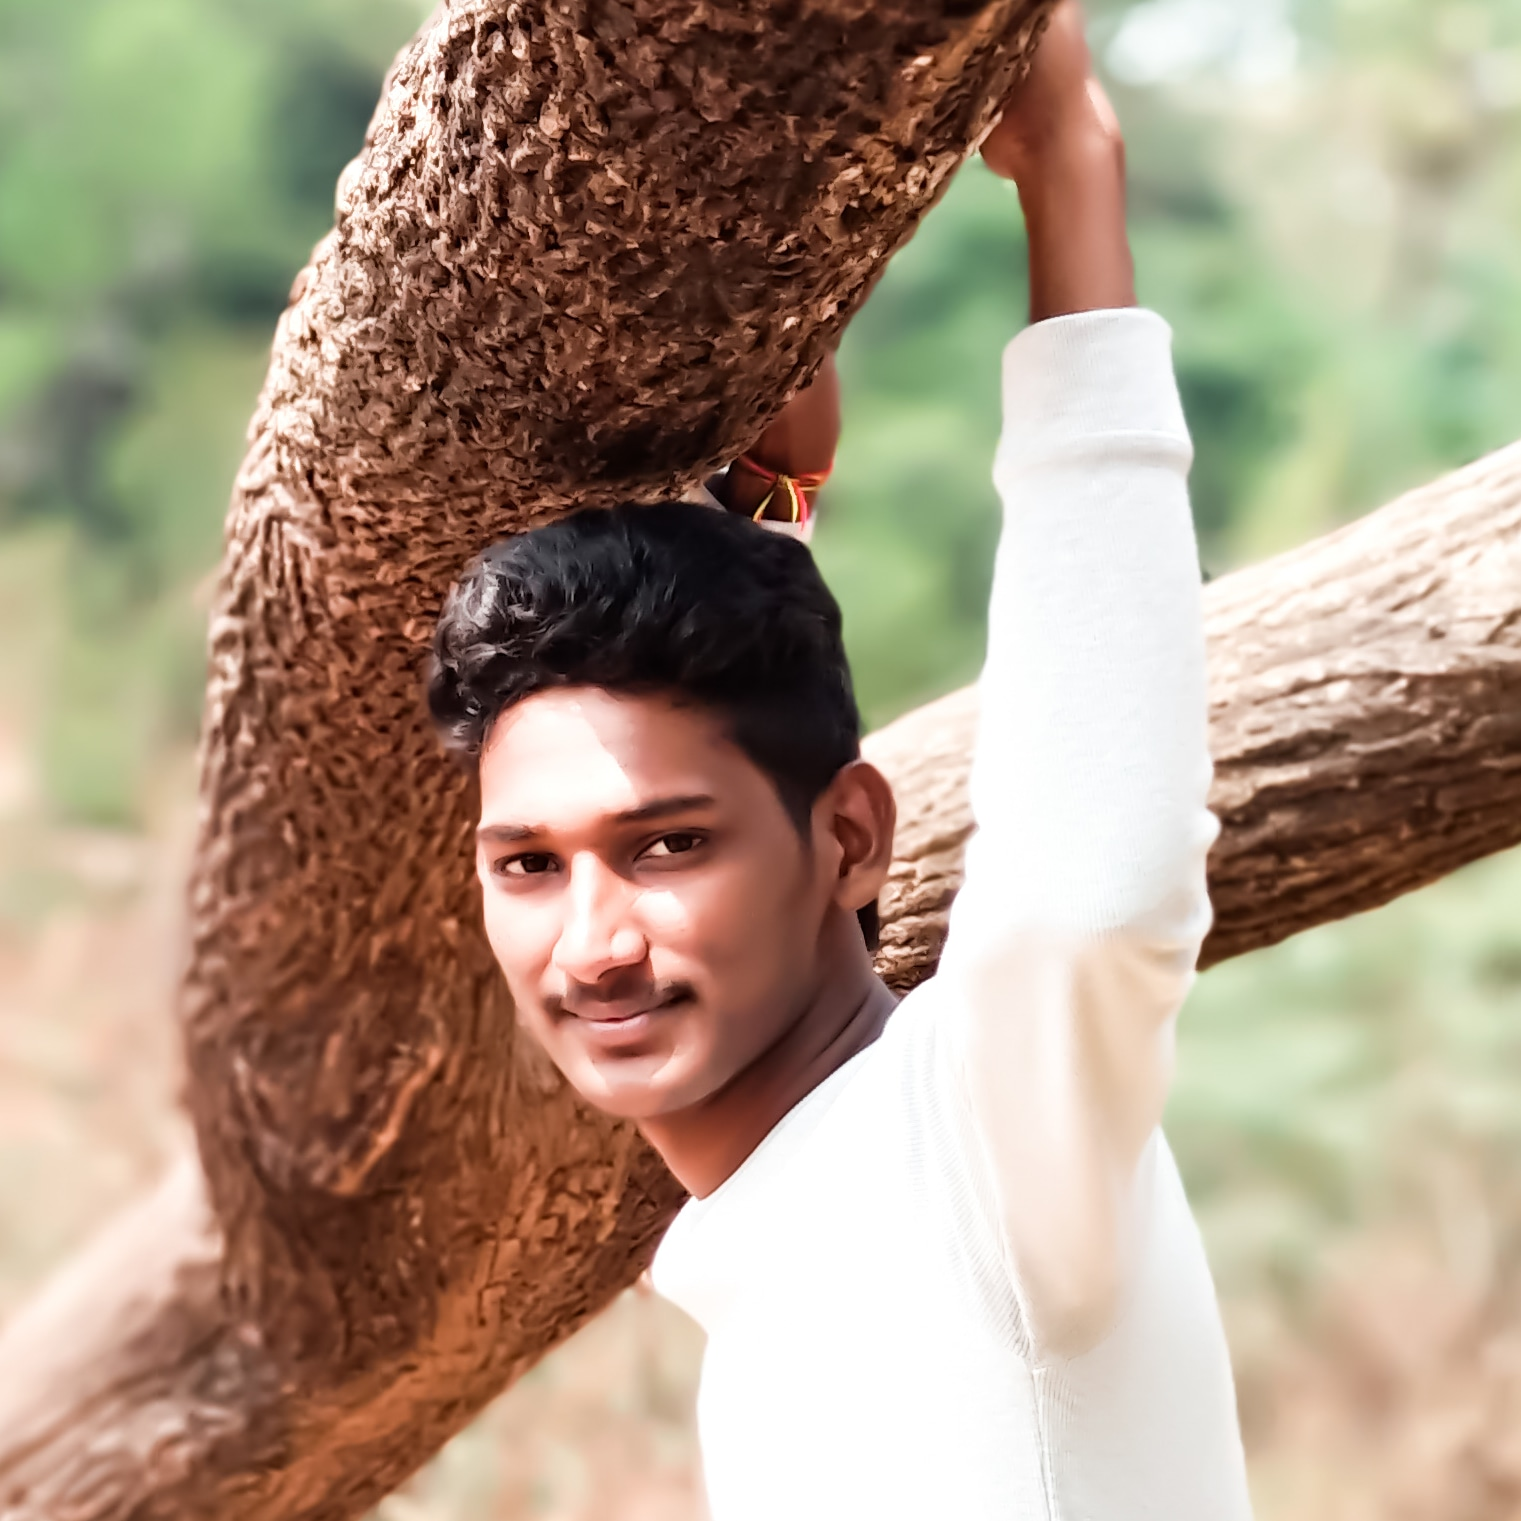

In [250]:
from IPython.display import Image
Image(filename='india.jpg')